# Introduction

We would be analyzing United States Census Bureau's 2017 Basic Monthly CPS,
using Python.

In [1]:
import zipfile
import pandas as pd
import numpy as np
import csv
import re
import matplotlib.pyplot as plt

In [2]:
!wget https://www2.census.gov/programs-surveys/cps/datasets/2017/basic/dec17pub.zip

--2023-09-07 11:34:00--  https://www2.census.gov/programs-surveys/cps/datasets/2017/basic/dec17pub.zip
Resolving www2.census.gov (www2.census.gov)... 23.197.19.181, 2600:1408:20:684::208c, 2600:1408:20:692::208c
Connecting to www2.census.gov (www2.census.gov)|23.197.19.181|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘dec17pub.zip’

dec17pub.zip            [   <=>              ]  12.12M  28.2MB/s    in 0.4s    

2023-09-07 11:34:01 (28.2 MB/s) - ‘dec17pub.zip’ saved [12707013]



In [3]:


with zipfile.ZipFile('/content/dec17pub.zip', 'r') as zipfile:
    zipfile.extract('dec17pub.dat', '/content')

In [4]:
pattern = r"(\d+ [-|–] \d+)"

with open("/content/metadata.txt", "r") as f:
    text = f.read()

# Find all the matches of the pattern in the text
matches = re.findall(pattern, text)

def is_correct_order(ranges):
    # Loop over the list of ranges, except the last one
    for number in range(len(ranges) - 1):
        # Split the current range and the next range by the dash
        current_range = re.split(r' – |-', ranges[number])
        next_range = re.split(r' – |-', ranges[number + 1])

        # Convert the strings to integers
        current_end = int(current_range[1])
        next_start = int(next_range[0])
        # Check if the current end is less than or equal to the next start
        if current_end > next_start:
            # If not, return False and the index where the order is violated
            return False, number, ranges[number]
    # If the loop finishes without returning False, return True
    return True


result = is_correct_order(matches)

In [5]:


with open("/content/metadata.txt", "r") as f:
    lines = f.readlines()
list_of_columns = []
placebo = []
# Loop through the list of ranges
for range in matches:
    # Loop through the list of lines from the metadata file
    for line in lines:
        # Check if the line contains the exact range match
        if re.search(rf"\b{re.escape(range)}\b", line):
            list_of_columns.append(line[:9])
cleaned_data = [line.split('\t')[0] for line in list_of_columns]
final_list = []
for line in cleaned_data:
    final_list.append(line)
zipped_list = zip(final_list, matches)
new_zipped_list = list(zipped_list)
print(new_zipped_list)

[('HRHHID', '1 - 15'), ('HRMONTH', '16 - 17'), ('HRYEAR4', '18 - 21'), ('HURESPLI', '22 - 23'), ('HUFINAL', '24 - 26'), ('FILLER', '27 - 28'), ('HETENURE', '29 - 30'), ('HEHOUSUT', '31 - 32'), ('HETELHHD', '33 - 34'), ('HETELAVL', '35 - 36'), ('HEPHONEO', '37 - 38'), ('HEFAMINC', '39 - 40'), ('HUTYPEA', '41 - 42'), ('HUTYPB', '43 - 44'), ('HUTYPC', '45 - 46'), ('HWHHWGT', '47 - 56'), ('HRINTSTA', '57 - 58'), ('HRNUMHOU', '59 - 60'), ('HRHTYPE', '61 - 62'), ('HRMIS', '63 - 64'), ('HUINTTYP', '65 - 66'), ('HUPRSCNT', '67 - 68'), ('HRLONGLK', '69 - 70'), ('HRHHID2', '71 - 75'), ('HWHHWTLN', '76 - 77'), ('FILLER', '78 - 78'), ('HUBUS', '79 - 80'), ('HUBUSL1', '81 - 82'), ('HUBUSL2', '83 - 84'), ('HUBUSL3', '85 - 86'), ('HUBUSL4', '87 - 88'), ('GEREG', '89 - 90'), ('GEDIV', '91 - 91'), ('FILLER', '92 – 92'), ('GESTFIPS', '93 - 94'), ('FILLER', '95 - 95'), ('GTCBSA', '96 - 100'), ('GTCO', '101 - 103'), ('GTCBSAST', '104 - 104'), ('GTMETSTA', '105 - 105'), ('GTINDVPC', '106 - 106'), ('GTCBSAS

In [6]:
# List of tuples specifying column names and their positions
columns = [('HRHHID', '1 - 15'), ('HRMONTH', '16 - 17'), ('HRYEAR4', '18 - 21'), ('HURESPLI', '22 - 23'), ('HUFINAL', '24 - 26'), ('FILLER', '27 - 28'), ('HETENURE', '29 - 30'), ('HEHOUSUT', '31 - 32'), ('HETELHHD', '33 - 34'), ('HETELAVL', '35 - 36'), ('HEPHONEO', '37 - 38'), ('HEFAMINC', '39 - 40'), ('HUTYPEA', '41 - 42'), ('HUTYPB', '43 - 44'), ('HUTYPC', '45 - 46'), ('HWHHWGT', '47 - 56'), ('HRINTSTA', '57 - 58'), ('HRNUMHOU', '59 - 60'), ('HRHTYPE', '61 - 62'), ('HRMIS', '63 - 64'), ('HUINTTYP', '65 - 66'), ('HUPRSCNT', '67 - 68'), ('HRLONGLK', '69 - 70'), ('HRHHID2', '71 - 75'), ('FILLER', '78 - 78'), ('HUBUS', '79 - 80'), ('HUBUSL1', '81 - 82'), ('HUBUSL2', '83 - 84'), ('HUBUSL3', '85 - 86'), ('HUBUSL4', '87 - 88'), ('GEREG', '89 - 90'), ('GEDIV', '91 - 91'), ('GESTFIPS', '93 - 94'), ('FILLER', '95 - 95'), ('GTCBSA', '96 - 100'), ('GTCO', '101 - 103'), ('GTCBSAST', '104 - 104'), ('GTMETSTA', '105 - 105'), ('GTINDVPC', '106 - 106'), ('GTCBSASZ', '107 - 107'), ('GTCSA', '108 - 110'), ('FILLER', '111 - 117'), ('PERRP', '118 - 119'), ('PEPARENT', '120 - 121'), ('PRTAGE', '122 - 123'), ('PRTFAGE', '124 - 124'), ('PEMARITL', '125 - 126'), ('PESPOUSE', '127 - 128'), ('PESEX', '129 - 130'), ('PEAFEVER', '131 - 132'), ('FILLER', '133 - 134'), ('PEAFNOW', '135 - 136'), ('PEEDUCA', '137 - 138'), ("PTDTRACE", '139 - 140'), ('PRDTHSP', '141 - 142'), ("PUCHINHH", "143 - 144"), ('FILLER', '145 - 146'), ('FILLER', '149 - 150'), ('PRFAMNUM', '151 - 152'), ('PRFAMREL', '153 - 154'), ('PRFAMTYP', '155 - 156'), ('PEHSPNON', '157 - 158'), ('PRMARSTA', '159 - 160'), ('PRPERTYP', '161 - 162'), ('PENATVTY', '163 - 165'), ('PEMNTVTY', '166 - 168'), ('PEFNTVTY', '169 - 171'), ('PRCITSHP', '172 - 173'), ('PRCITFLG', '174 - 175'), ('PRINUSYR', '176 - 177'), ('PUSLFPRX', '178 - 179'), ('PEMLR', '180 - 181'), ('PUWK', '182 - 183'), ('PUBUS1', '184 - 185'), ('PUBUS2OT', '186 - 187'), ('PUBUSCK1', '188 - 189'), ('PUBUSCK2', '190 - 191'), ('PUBUSCK3', '192 - 193'), ('PUBUSCK4', '194 - 195'), ('PURETOT', '196 - 197'), ('PUDIS', '198 - 199'), ('PERET1', '200 - 201'), ('PUDIS1', '202 - 203'), ('PUDIS2', '204 - 205'), ('PUABSOT', '206 - 207'), ('PULAY', '208 - 209'), ('PEABSRSN', '210 - 211'), ('PEABSPDO', '212 - 213'), ('PEMJOT', '214 - 215'), ('PEMJNUM', '216 - 217'), ('PEHRUSL1', '218 - 219'), ('PEHRUSL2', '220 - 221'), ('PEHRFTPT', '222 - 223'), ('PEHRUSLT', '224 - 226'), ('PEHRWANT', '227 - 228'), ('PEHRRSN1', '229 - 230'), ('PEHRRSN2', '231 - 232'), ('PEHRRSN3', '233 - 234'), ('PUHROFF1', '235 - 236'), ('PUHROFF2', '237 - 238'), ('PUHROT1', '239 - 240'), ('PUHROT2', '241 - 242'), ('PEHRACT1', '243 - 244'), ('PEHRACT2', '245 - 246'), ('PEHRACTT', '247 - 249'), ('PEHRAVL', '250 - 251'), ('FILLER', '252 - 256'), ('PUHRCK1', '257 - 258'), ('PUHRCK2', '259 - 260'), ('PUHRCK3', '261 - 262'), ('PUHRCK4', '263 - 264'), ('PUHRCK5', '265 - 266'), ('PUHRCK6', '267 - 268'), ('PUHRCK7', '269 - 270'), ('PULAYDT', '273 - 274'), ('PULAY6M', '275 - 276'), ('PELAYAVL', '277 - 278'), ('PULAYAVR', '279 - 280'), ('PELAYLK', '281 - 282'), ('PELAYDUR', '283 - 285'), ('PELAYFTO', '286 - 287'), ('PULAYCK1', '288 - 289'), ('PULAYCK2', '290 - 291'), ('PULAYCK3', '292 - 293'), ('PULK', '294 - 295'), ('PELKM1', '296 - 297'), ('PULKM2', '298 - 299'), ('PULKM3', '300 - 301'), ('PULKM4', '302 - 303'), ('PULKM5', '304 - 305'), ('PULKM6', '306 - 307'), ('PULKDK1', '308 - 309'), ('PULKDK2', '310 - 311'), ('PULKDK3', '312 - 313'), ('PULKDK4', '314 - 315'), ('PULKDK5', '316 - 317'), ('PULKPS1', '320 - 321'), ('PULKPS2', '322 - 323'), ('PULKPS3', '324 - 325'), ('PULKPS4', '326 - 327'), ('PULKPS5', '328 - 329'), ('PULKPS6', '330 - 331'), ('PELKAVL', '332 - 333'), ('PULKAVR', '334 - 335'), ('PELKLL1O', '336 - 337'), ('PELKLL2O', '338 - 339'), ('PELKLWO', '340 - 341'), ('PELKDUR', '342 - 344'), ('PELKFTO', '345 - 346'), ('PEDWWNTO', '347 - 348'), ('PEDWRSN', '349 - 350'), ('PEDWLKO', '351 - 352'), ('PEDWWK', '353 - 354'), ('PEDW4WK', '355 - 356'), ('PEDWLKWK', '357 - 358'), ('PEDWAVL', '359 - 360'), ('PEDWAVR', '361 - 362'), ('PUDWCK1', '363 - 364'), ('PUDWCK2', '365 - 366'), ('PUDWCK3', '367 - 368'), ('PUDWCK4', '369 - 370'), ('PUDWCK5', '371 - 372'), ('PEJHWKO', '373 - 374'), ('PUJHDP1O', '375 - 376'), ('PEJHRSN', '377 - 378'), ('PEJHWANT', '379 - 380'), ('PUJHCK1', '381 - 382'), ('PUJHCK2', '383 - 384'), ('PRABSREA', '385 - 386'), ('PRCIVLF', '387 - 388'), ('PRDISC', '389 - 390'), ('PREMPHRS', '391 - 392'), ('PREMPNOT', '393 - 394'), ('PREXPLF', '395 - 396'), ('PRFTLF', '397 - 398'), ('PRHRUSL', '399 - 400'), ('PRJOBSEA', '401 - 402'), ('PRPTHRS', '403 - 404'), ('PRPTREA', '405 - 406'), ('PRUNEDUR', '407 - 409'), ('FILLER', '410 - 411'), ('PRUNTYPE', '412 - 413'), ('PRWKSCH', '414 - 415'), ('PRWKSTAT', '416 - 417'), ('PRWNTJOB', '418 - 419'), ('PUJHCK3', '420 - 421'), ('PUJHCK4', '422 - 423'), ('PUJHCK5', '424 - 425'), ('PUIODP1', '426 - 427'), ('PUIODP2', '428 - 429'), ('PUIODP3', '430 - 431'), ('PEIO1COW', '432 - 433'), ('PUIO1MFG', '434 - 435'), ('PADDING', '436 - 441'), ('PEIO2COW', '442 - 443'), ('PUIO2MFG', '444 - 445'), ('PADDING', '446 - 451'), ('PUIOCK1', '452 - 453'), ('PUIOCK2', '454 - 455'), ('PUIOCK3', '456 - 457'), ('PRIOELG', '458 - 459'), ('PRAGNA', '460 - 461'), ('PRCOW1', '462 - 463'), ('PRCOW2', '464 - 465'), ('PRCOWPG', '466 - 467'), ('PRDTCOW1', '468 - 469'), ('PRDTCOW2', '470 - 471'), ('PRDTIND1', '472 - 473'), ('PRDTIND2', '474 - 475'), ('PRDTOCC1', '476 - 477'), ('PRDTOCC2', '478 - 479'), ('PREMP', '480 - 481'), ('PRMJIND1', '482 - 483'), ('PRMJIND2', '484 - 485'), ('PRMJOCC1', '486 - 487'), ('PRMJOCC2', '488 - 489'), ('PRMJOCGR', '490 - 491'), ('PRNAGPWS', '492 - 493'), ('PRNAGWS', '494 - 495'), ('PRSJMJ', '496 - 497'), ('PRERELG', '498 - 499'), ('PEERNUOT', '500 - 501'), ('PEERNPER', '502 - 503'), ('PEERNRT', '504 - 505'), ('PEERNHRY', '506 - 507'), ('PUERNH1C', '508 - 511'), ('PEERNH2', '512 - 515'), ('PEERNH1O', '516 - 519'), ('PRERNHLY', '520 - 523'), ('PTHR', '524 - 524'), ('PEERNHRO', '525 - 526'), ('PRERNWA', '527 - 534'), ('PTWK', '535 - 535'), ('FILLER', '536 - 539'), ('PEERN', '540 - 547'), ('PUERN2', '548 - 555'), ('PTOT', '556 - 556'), ('FILLER', '557 - 558'), ('PEERNWKP', '559 - 560'), ('PEERNLAB', '561 - 562'), ('PEERNCOV', '563 - 564'), ('PENLFJH', '565 - 566'), ('PENLFRET ', '567 - 568'), ('PENLFACT', '569 - 570'), ('PUNLFCK1', '571 - 572'), ('PUNLFCK2', '573 - 574'), ('PESCHENR', '575 - 576'), ('PESCHFT', '577 - 578'), ('PESCHLVL', '579 - 580'), ('PRNLFSCH', '581 - 582'), ('PWFMWGT', '583 - 592'), ('PWLGWGT', '593 - 602'), ('PWORWGT', '603 - 612'), ('PWSSWGT', '613 - 622'), ('PWVETWGT', '623 - 632'), ('PRNMCHLD', '635 - 636'), ('PXPDEMP1', '637 - 638'), ('PRWERNAL', '639 - 640'), ('PRHERNAL', '641 - 642'), ('HXTENURE', '643 - 644'), ('HXHOUSUT', '645 - 646'), ('HXTELHHD', '647 - 648'), ('HXTELAVL', '649 - 650'), ('HXPHONEO', '651 - 652'), ('PXINUSYR', '653 - 654'), ('PXRRP', '655 - 656'), ('PXPARENT', '657 - 658'), ('PXAGE', '659 - 660'), ('PXMARITL', '661 - 662'), ('PXSPOUSE', '663 - 664'), ('PXSEX', '665 - 666'), ('PXAFWHN1', '667 - 668'), ('PXAFNOW', '669 - 670'), ('PXEDUCA', '671 - 672'), ('PXRACE1', '673 - 674'), ('PXNATVTY', '675 - 676'), ('PXMNTVTY', '677 - 678'), ('PXFNTVTY', '679 - 680'), ('PXNMEMP1', '681 - 682'), ('PXHSPNON', '683 - 684'), ('PXMLR', '685 - 686'), ('PXRET1', '687 - 688'), ('PXABSRSN', '689 - 690'), ('PXABSPDO', '691 - 692'), ('PXMJOT', '693 - 694'), ('PXMJNUM', '695 - 696'), ('PXHRUSL1', '697 - 698'), ('PXHRUSL2', '699 - 700'), ('PXHRFTPT', '701 - 702'), ('PXHRUSLT', '703 - 704'), ('PXHRWANT', '705 - 706'), ('PXHRRSN1', '707 - 708'), ('PXHRACT1', '711 - 712'), ('PXHRACT2', '713 - 714'), ('PXHRACTT', '715 - 716'), ('PXHRRSN3', '717 - 718'), ('PXHRAVL', '719 - 720'), ('PXLAYAVL', '721 - 722'), ('PXLAYLK', '723 - 724'), ('PXLAYDUR', '725 - 726'), ('PXLAYFTO', '727 - 728'), ('PXLKM1', '729 - 730'), ('PXLKAVL', '731 - 732'), ('PXLKLL1O', '733 - 734'), ('PXLKLL2O', '735 - 736'), ('PXLKLWO', '737 - 738'), ('PXLKDUR', '739 - 740'), ('PXLKFTO', '741 - 742'), ('PXDWWNTO', '743 - 744'), ('PXDWRSN', '745 - 746'), ('PXDWLKO', '747 - 748'), ('PXDWWK', '749 - 750'), ('PXDW4WK', '751 - 752'), ('PXDWLKWK', '753 - 754'), ('PXDWAVL', '755 - 756'), ('PXDWAVR', '757 - 758'), ('PXJHWKO', '759 - 760'), ('PXJHRSN', '761 - 762'), ('PXJHWANT', '763 - 764'), ('PXIO1COW', '765 - 766'), ('PXIO1ICD', '767 - 768'), ('PXIO1OCD', '769 - 770'), ('PXIO2COW', '771 - 772'), ('PXIO2ICD', '773 - 774'), ('PXIO2OCD', '775 - 776'), ('PXERNUOT', '777 - 778'), ('PXERNPER', '779 - 780'), ('PXERNH1O', '781 - 782'), ('PXERNHRO', '783 - 784'), ('PXERN', '785 - 786'), ('PXPDEMP2', '787 - 788'), ('PXNMEMP2', '789 - 790'), ('PXERNWKP', '791 - 792'), ('PXERNRT', '793 - 794'), ('PXERNH2', '797 - 798'), ('PXERNLAB', '799 - 800'), ('PXERNCOV', '801 - 802'), ('PXNLFJH', '803 - 804'), ('PXNLFRET', '805 - 806'), ('PXNLFACT', '807 - 808'), ('PXSCHENR', '809 - 810'), ('PXSCHFT', '811 - 812'), ('PXSCHLVL', '813 - 814'), ('QSTNUM', '815 - 819'), ('OCCURNUM', '820 - 821'), ('PEDIPGED', '822 - 823'), ('PEHGCOMP', '824 - 825'), ('PECYC', '826 - 827'), ('PADDING', '828 - 833'), ('PXDIPGED ', '834 - 835'), ('PXHGCOMP', '836 - 837'), ('PXCYC', '838 - 839'), ('PADDING', '840 - 845'), ('PWCMPWGT', '846 - 855'), ('PEIO1ICD', '856 - 859'), ('PEIO1OCD', '860 - 863'), ('PEIO2ICD', '864 - 867'), ('PEIO2OCD', '868 - 871'), ('PRIMIND1', '872 - 873'), ('PRIMIND2', '874 - 875'), ('PEAFWHN1', '876 - 877'), ('PEAFWHN2', '878 - 879'), ('PEAFWHN3', '880 - 881'), ('PEAFWHN4', '882 - 883'), ('PXAFEVER', '884 - 885'), ('PELNDAD', '886 - 887'), ('PELNMOM', '888 - 889'), ('PEMOMTYP', '892 - 893'), ('PECOHAB', '894 - 895'), ('PXLNDAD', '896 - 897'), ('PXLNMOM', '898 - 899'), ('PXDADTYP', '900 - 901'), ('PXMOMTYP', '902 - 903'), ('PEDISEAR', '906 - 907'), ('PEDISEYE', '908 - 909'), ('PEDISREM', '910 - 911'), ('PEDISPHY', '912 - 913'), ('PEDISDRS', '914 - 915'), ('PEDISOUT', '916 - 917'), ('PRDISFLG', '918 - 919'), ('PXDISEAR', '920 - 921'), ('PXDISREM', '924 - 925'), ('PXDISPHY', '926 - 927'), ('PXDISDRS', '928 - 929'), ('PXDISOUT', '930 - 931'), ('HXFAMINC', '932 - 933'), ('PEPDEMP1', '936 - 937'), ('PTNMEMP1', '938 - 939'), ('PEPDEMP2', '940 - 941'), ('PTNMEMP2', '942 - 943'), ('PECERT1', '944 - 945'), ('PECERT2', '946 - 947'), ('PECERT3', '948 - 949'), ('PXCERT1', '950 - 951'), ('PXCERT2', '952 - 953'), ('PXCERT3', '954 - 955'), ('FILLER', '956 - 1000')] # Include all column specifications
columns_to_be_used = ["HRHHID" , "HRHHID2", "HRYEAR4","HRMONTH", "HUFINAL", "HEHOUSUT", "HRHTYPE", "HETELHHD","HETELAVL", "HEPHONEO", "HUINTTYP", "HEFAMINC", "GEDIV", "PTDTRACE"]
# Function to extract data from a row based on the column positions
def extract_data(row, spec):
    start = int(spec.split(' - ')[0]) - 1
    end = int(spec.split(' - ')[1])
    return row[start:end]

# Open the DAT file for reading and the CSV file for writing
with open('/content/dec17pub.dat', 'r') as dat_file, open('/content/output.csv', 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)

    # Write the header row to the CSV file
    header_row = [column[0] for column in columns if column[0] in columns_to_be_used]
    csv_writer.writerow(header_row)

    # Iterate through each line in the DAT file
    for line in dat_file:
        data_row = []

        # Extract data based on column positions
        for column in columns:
            if column[0] in columns_to_be_used:
              data = extract_data(line, column[1])
              data_row.append(data)

        # Write the data row to the CSV file
        csv_writer.writerow(data_row)

print("Conversion completed successfully.")


Conversion completed successfully.


In [7]:
dtypes = {col: str for col in columns_to_be_used}
df = pd.read_csv("/content/output.csv", dtype=dtypes)
df.head()

,HRHHID,HRMONTH,HRYEAR4,HUFINAL,HEHOUSUT,HETELHHD,HETELAVL,HEPHONEO,HEFAMINC,HRHTYPE,HUINTTYP,HRHHID2,GEDIV,PTDTRACE
0,000004795110719,12,2017,201,1,1,-1,1,9,1,2,06011,6,1
1,000004795110719,12,2017,201,1,1,-1,1,9,1,2,06011,6,1
2,000071691004941,12,2017,201,1,1,-1,1,11,1,1,06111,6,1
3,000071691004941,12,2017,201,1,1,-1,1,11,1,1,06111,6,1
4,000071691004941,12,2017,201,1,1,-1,1,11,1,1,06111,6,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146456 entries, 0 to 146455
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   HRHHID    146456 non-null  object
 1   HRMONTH   146456 non-null  object
 2   HRYEAR4   146456 non-null  object
 3   HUFINAL   146456 non-null  object
 4   HEHOUSUT  146456 non-null  object
 5   HETELHHD  146456 non-null  object
 6   HETELAVL  146456 non-null  object
 7   HEPHONEO  146456 non-null  object
 8   HEFAMINC  146456 non-null  object
 9   HRHTYPE   146456 non-null  object
 10  HUINTTYP  146456 non-null  object
 11  HRHHID2   146456 non-null  object
 12  GEDIV     146456 non-null  object
 13  PTDTRACE  146456 non-null  object
dtypes: object(14)
memory usage: 15.6+ MB


In [9]:
df.shape

(146456, 14)

In [10]:
df.isna().sum()

HRHHID      0
HRMONTH     0
HRYEAR4     0
HUFINAL     0
HEHOUSUT    0
HETELHHD    0
HETELAVL    0
HEPHONEO    0
HEFAMINC    0
HRHTYPE     0
HUINTTYP    0
HRHHID2     0
GEDIV       0
PTDTRACE    0
dtype: int64

In [11]:
df.duplicated().sum()

71222

In [12]:
for column in df.columns:
    unique_values = df[column].astype(str).unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'HRHHID': ['000004795110719' '000071691004941' '000110177987986' ...
 '965577120906503' '966353301820509' '996678801450501']
Unique values in column 'HRMONTH': ['12']
Unique values in column 'HRYEAR4': ['2017']
Unique values in column 'HUFINAL': ['201' '213' '216' '226' '  1' '217' '219' '218' '203' '225' '232' '231'
 '  4' '230' '229' '227' '228' '259' '  2' '223' '240' '248' '241' '244'
 '214' '233' '243' '247' '224' '245' '242' '204' ' 20']
Unique values in column 'HEHOUSUT': [' 1' '12' ' 5' '10' ' 6' ' 7' ' 2' ' 4' ' 3' ' 8' '11']
Unique values in column 'HETELHHD': [' 1' '-1' ' 2' '-3' '-2']
Unique values in column 'HETELAVL': ['-1' ' 2' '-3' ' 1' '-2']
Unique values in column 'HEPHONEO': [' 1' ' 0']
Unique values in column 'HEFAMINC': [' 9' '11' '14' '-1' ' 5' '13' '10' '15' ' 6' ' 7' '16' '12' ' 8' ' 1'
 ' 4' ' 3' ' 2']
Unique values in column 'HRHTYPE': [' 1' ' 0' ' 7' ' 4' ' 6' ' 3' '10' ' 2' ' 5' ' 9' ' 8']
Unique values in column 'HUINTTYP': [' 2' ' 1

In [13]:
df["household_identifier"] = df["HRHHID"].str.cat(df["HRHHID2"], sep="")

# Drop the individual HRHHID and HRHHID2 columns if needed
df.drop(["HRHHID", "HRHHID2"], axis=1, inplace=True)

In [14]:
df.head()

,HRMONTH,HRYEAR4,HUFINAL,HEHOUSUT,HETELHHD,HETELAVL,HEPHONEO,HEFAMINC,HRHTYPE,HUINTTYP,GEDIV,PTDTRACE,household_identifier
0,12,2017,201,1,1,-1,1,9,1,2,6,1,00000479511071906011
1,12,2017,201,1,1,-1,1,9,1,2,6,1,00000479511071906011
2,12,2017,201,1,1,-1,1,11,1,1,6,1,00007169100494106111
3,12,2017,201,1,1,-1,1,11,1,1,6,1,00007169100494106111
4,12,2017,201,1,1,-1,1,11,1,1,6,1,00007169100494106111


In [15]:
df["interview_time"] = df["HRYEAR4"].str.cat(df["HRMONTH"], sep="/")

df.drop(["HRYEAR4", "HRMONTH"], axis=1, inplace=True)

In [16]:
df.head()

,HUFINAL,HEHOUSUT,HETELHHD,HETELAVL,HEPHONEO,HEFAMINC,HRHTYPE,HUINTTYP,GEDIV,PTDTRACE,household_identifier,interview_time
0,201,1,1,-1,1,9,1,2,6,1,00000479511071906011,2017/12
1,201,1,1,-1,1,9,1,2,6,1,00000479511071906011,2017/12
2,201,1,1,-1,1,11,1,1,6,1,00007169100494106111,2017/12
3,201,1,1,-1,1,11,1,1,6,1,00007169100494106111,2017/12
4,201,1,1,-1,1,11,1,1,6,1,00007169100494106111,2017/12


In [17]:

# Define a mapping dictionary for HUFINAL values
hufinal_mapping = {
    '  1': 'FULLY COMPLETE CATI INTERVIEW',
    '  2': 'PARTIALLY COMPLETED CATI INTERVIEW',
    '  3': 'COMPLETE BUT PERSONAL VISIT REQUESTED NEXT MONTH',
    '  4': 'PARTIAL, NOT COMPLETE AT CLOSEOUT',
    '  5': 'LABOR FORCE COMPLETE, SUPPLEMENT INCOMPLETE - CATI',
    '  6': 'LF COMPLETE, SUPPLEMENT DK ITEMS INCOMPLETE AT CLOSEOUT–ASEC ONLY',
    ' 20': 'HH OCCUPIED ENTIRELY BY ARMED FORCES MEMBERS OR ALL UNDER 15 YEARS OF AGE',
    '201': 'CAPI COMPLETE',
    '202': 'CALLBACK NEEDED',
    '203': 'SUFFICIENT PARTIAL - PRECLOSEOUT',
    '204': 'SUFFICIENT PARTIAL - AT CLOSEOUT',
    '205': 'LABOR FORCE COMPLETE, - SUPPL. INCOMPLETE - CAPI',
    '213': 'LANGUAGE BARRIER',
    '214': 'UNABLE TO LOCATE',
    '216': 'NO ONE HOME',
    '217': 'TEMPORARILY ABSENT',
    '218': 'REFUSED',
    '219': 'OTHER OCCUPIED - SPECIFY',
    '223': 'ENTIRE HOUSEHOLD ARMED FORCES',
    '224': 'ENTIRE HOUSEHOLD UNDER 15',
    '225': 'TEMP. OCCUPIED W/PERSONS WITH URE',
    '226': 'VACANT REGULAR',
    '227': 'VACANT - STORAGE OF HHLD FURNITURE',
    '228': 'UNFIT, TO BE DEMOLISHED',
    '229': 'UNDER CONSTRUCTION, NOT READY',
    '230': 'CONVERTED TO TEMP BUSINESS OR STORAGE',
    '231': 'UNOCCUPIED TENT OR TRAILER SITE',
    '232': 'PERMIT GRANTED - CONSTRUCTION NOT STARTED',
    '233': 'OTHER - SPECIFY',
    '240': 'DEMOLISHED',
    '241': 'HOUSE OR TRAILER MOVED',
    '242': 'OUTSIDE SEGMENT',
    '243': 'CONVERTED TO PERM. BUSINESS OR STORAGE',
    '244': 'MERGED',
    '245': 'CONDEMNED',
    '246': 'BUILT AFTER APRIL 1, 2000',
    '247': 'UNUSED SERIAL NO./LISTING SHEET LINE',
    '248': 'OTHER - SPECIFY',
    '256': 'REMOVED DURING SUB-SAMPLING',
    '257': 'UNIT ALREADY HAD A CHANCE OF SELECTION'
}


df['HUFINAL'] = df['HUFINAL'].replace(hufinal_mapping)

In [18]:
df['HUFINAL'].unique()

array(['CAPI COMPLETE', 'LANGUAGE BARRIER', 'NO ONE HOME',
       'VACANT REGULAR', 'FULLY COMPLETE CATI INTERVIEW',
       'TEMPORARILY ABSENT', 'OTHER OCCUPIED - SPECIFY', 'REFUSED',
       'SUFFICIENT PARTIAL - PRECLOSEOUT',
       'TEMP. OCCUPIED W/PERSONS WITH URE',
       'PERMIT GRANTED - CONSTRUCTION NOT STARTED',
       'UNOCCUPIED TENT OR TRAILER SITE',
       'PARTIAL, NOT COMPLETE AT CLOSEOUT',
       'CONVERTED TO TEMP BUSINESS OR STORAGE',
       'UNDER CONSTRUCTION, NOT READY',
       'VACANT - STORAGE OF HHLD FURNITURE', 'UNFIT, TO BE DEMOLISHED',
       '259', 'PARTIALLY COMPLETED CATI INTERVIEW',
       'ENTIRE HOUSEHOLD ARMED FORCES', 'DEMOLISHED', 'OTHER - SPECIFY',
       'HOUSE OR TRAILER MOVED', 'MERGED', 'UNABLE TO LOCATE',
       'CONVERTED TO PERM. BUSINESS OR STORAGE',
       'UNUSED SERIAL NO./LISTING SHEET LINE',
       'ENTIRE HOUSEHOLD UNDER 15', 'CONDEMNED', 'OUTSIDE SEGMENT',
       'SUFFICIENT PARTIAL - AT CLOSEOUT',
       'HH OCCUPIED ENTIRELY BY ARM

In [19]:

# Define a mapping dictionary for HEHOUSUT values
hehousut_mapping = {
    ' 0': 'OTHER UNIT',
    ' 1': 'HOUSE, APARTMENT, FLAT',
    ' 2': 'HU IN NONTRANSIENT HOTEL, MOTEL, ETC.',
    ' 3': 'HU PERMANENT IN TRANSIENT HOTEL, MOTEL',
    ' 4': 'HU IN ROOMING HOUSE',
    ' 5': 'MOBILE HOME OR TRAILER W/NO PERM. ROOM ADDED',
    ' 6': 'MOBILE HOME OR TRAILER W/1 OR MORE PERM. ROOMS ADDED',
    ' 7': 'HU NOT SPECIFIED ABOVE',
    ' 8': 'QUARTERS NOT HU IN ROOMING OR BRDING HS',
    ' 9': 'UNIT NOT PERM. IN TRANSIENT HOTL, MOTL',
    '10': 'UNOCCUPIED TENT SITE OR TRLR SITE',
    '11': 'STUDENT QUARTERS IN COLLEGE DORM',
    '12': 'OTHER UNIT NOT SPECIFIED ABOVE'
}

# Replace HEHOUSUT values using the mapping dictionary
df['HEHOUSUT'] = df['HEHOUSUT'].replace(hehousut_mapping)


In [20]:
df['HEHOUSUT'].unique()

array(['HOUSE, APARTMENT, FLAT', 'OTHER UNIT NOT SPECIFIED ABOVE',
       'MOBILE HOME OR TRAILER W/NO PERM. ROOM ADDED',
       'UNOCCUPIED TENT SITE OR TRLR SITE',
       'MOBILE HOME OR TRAILER W/1 OR MORE PERM. ROOMS ADDED',
       'HU NOT SPECIFIED ABOVE', 'HU IN NONTRANSIENT HOTEL, MOTEL, ETC.',
       'HU IN ROOMING HOUSE', 'HU PERMANENT IN TRANSIENT HOTEL, MOTEL',
       'QUARTERS NOT HU IN ROOMING OR BRDING HS',
       'STUDENT QUARTERS IN COLLEGE DORM'], dtype=object)

In [21]:
# Define a mapping dictionary for HRHTYPE values
hrhtype_mapping = {
    ' 0': 'NON-INTERVIEW HOUSEHOLD',
    ' 1': 'HUSBAND/WIFE PRIMARY FAMILY (NEITHER AF)',
    ' 2': 'HUSB/WIFE PRIM. FAMILY (EITHER/BOTH AF)',
    ' 3': 'UNMARRIED CIVILIAN MALE-PRIM. FAM HHLDER',
    ' 4': 'UNMARRIED CIV. FEMALE-PRIM FAM HHLDER',
    ' 5': 'PRIMARY FAMILY HHLDER-RP IN AF, UNMAR.',
    ' 6': 'CIVILIAN MALE PRIMARY INDIVIDUAL',
    ' 7': 'CIVILIAN FEMALE PRIMARY INDIVIDUAL',
    ' 8': 'PRIMARY INDIVIDUAL HHLD-RP IN AF',
    ' 9': 'GROUP QUARTERS WITH FAMILY',
    '10': 'GROUP QUARTERS WITHOUT FAMILY'
}

# Replace HRHTYPE values using the mapping dictionary
df['HRHTYPE'] = df['HRHTYPE'].replace(hrhtype_mapping)
df['HRHTYPE'].unique()

array(['HUSBAND/WIFE PRIMARY FAMILY (NEITHER AF)',
       'NON-INTERVIEW HOUSEHOLD', 'CIVILIAN FEMALE PRIMARY INDIVIDUAL',
       'UNMARRIED CIV. FEMALE-PRIM FAM HHLDER',
       'CIVILIAN MALE PRIMARY INDIVIDUAL',
       'UNMARRIED CIVILIAN MALE-PRIM. FAM HHLDER',
       'GROUP QUARTERS WITHOUT FAMILY',
       'HUSB/WIFE PRIM. FAMILY (EITHER/BOTH AF)',
       'PRIMARY FAMILY HHLDER-RP IN AF, UNMAR.',
       'GROUP QUARTERS WITH FAMILY', 'PRIMARY INDIVIDUAL HHLD-RP IN AF'],
      dtype=object)

In [22]:
hetelhhd_mapping = {
    ' 1': 'YES',
    '-1': 'YES',
    ' 2': 'NO',
    '-2': "NO",
    "-3": "invalid entry"
}

# Replace HETELHHD values using the mapping dictionary
df['HETELHHD'] = df['HETELHHD'].replace(hetelhhd_mapping)
df['HETELHHD'].unique()

array(['YES', 'NO', 'invalid entry'], dtype=object)

In [23]:

hetelavl_mapping = {
    ' 1': 'YES',
    '-1': 'YES',
    ' 2': 'NO',
    '-2': "NO",
    "-3": "invalid entry"
}

# Replace HETELAVL values using the mapping dictionary
df['HETELAVL'] = df['HETELAVL'].replace(hetelavl_mapping)
df['HETELAVL'].unique()

array(['YES', 'NO', 'invalid entry'], dtype=object)

In [24]:
hephoneo_mapping = {
    ' 1': 'YES',
    ' 0': 'NO'
}

# Replace HETELAVL values using the mapping dictionary
df['HEPHONEO'] = df['HEPHONEO'].replace(hephoneo_mapping)
df['HEPHONEO'].unique()

array(['YES', 'NO'], dtype=object)

In [25]:
df['HEPHONEO'].value_counts()

YES    117854
NO      28602
Name: HEPHONEO, dtype: int64

In [26]:

# Replace codes with meanings in the 'HUINTTYP' column
df['HUINTTYP'] = df['HUINTTYP'].replace({
    ' 0': 'NONINTERVIEW/INDETERMINATE',
    ' 1': 'PERSONAL',
    '-1': 'PERSONAL',
    ' 2': 'TELEPHONE'
})

# Display the updated DataFrame
print(df['HUINTTYP'].unique())


['TELEPHONE' 'PERSONAL']


In [27]:
hefaminc_mapping = {
    ' 1': 'LESS THAN $5,000',
    '-1': 'LESS THAN $5,000',
    ' 2': '5,000 TO 7,499',
    ' 3': '7,500 TO 9,999',
    ' 4': '10,000 TO 12,499',
    ' 5': '12,500 TO 14,999',
    ' 6': '15,000 TO 19,999',
    ' 7': '20,000 TO 24,999',
    ' 8': '25,000 TO 29,999',
    ' 9': '30,000 TO 34,999',
    '10': '35,000 TO 39,999',
    '11': '40,000 TO 49,999',
    '12': '50,000 TO 59,999',
    '13': '60,000 TO 74,999',
    '14': '75,000 TO 99,999',
    '15': '100,000 TO 149,999',
    '16': '150,000 OR MORE'
}

# Replace codes with meanings including the space in front
df['HEFAMINC'] = df['HEFAMINC'].replace(hefaminc_mapping)
print(df['HEFAMINC'].unique())
print(df['HEFAMINC'].value_counts())

['30,000 TO 34,999' '40,000 TO 49,999' '75,000 TO 99,999'
 'LESS THAN $5,000' '12,500 TO 14,999' '60,000 TO 74,999'
 '35,000 TO 39,999' '100,000 TO 149,999' '15,000 TO 19,999'
 '20,000 TO 24,999' '150,000 OR MORE' '50,000 TO 59,999'
 '25,000 TO 29,999' '10,000 TO 12,499' '7,500 TO 9,999' '5,000 TO 7,499']
LESS THAN $5,000      23527
100,000 TO 149,999    17794
75,000 TO 99,999      16557
150,000 OR MORE       15704
60,000 TO 74,999      13442
50,000 TO 59,999       9971
40,000 TO 49,999       9788
30,000 TO 34,999       6743
35,000 TO 39,999       6620
20,000 TO 24,999       6312
25,000 TO 29,999       5803
15,000 TO 19,999       4518
10,000 TO 12,499       3161
12,500 TO 14,999       2614
7,500 TO 9,999         2277
5,000 TO 7,499         1625
Name: HEFAMINC, dtype: int64


In [28]:


# Define a dictionary to map codes to meanings
gediv_mapping = {
    '1': 'NEW ENGLAND',
    '2': 'MIDDLE ATLANTIC',
    '3': 'EAST NORTH CENTRAL',
    '4': 'WEST NORTH CENTRAL',
    '5': 'SOUTH ATLANTIC',
    '6': 'EAST SOUTH CENTRAL',
    '7': 'WEST SOUTH CENTRAL',
    '8': 'MOUNTAIN',
    '9': 'PACIFIC'
}

# Replace codes with meanings including the space in front
df['GEDIV'] = df['GEDIV'].replace(gediv_mapping)

# Display the updated 'GEDIV' column
print(df['GEDIV'].unique())
print(df['GEDIV'].value_counts())

['EAST SOUTH CENTRAL' 'PACIFIC' 'MOUNTAIN' 'WEST SOUTH CENTRAL'
 'NEW ENGLAND' 'SOUTH ATLANTIC' 'EAST NORTH CENTRAL' 'WEST NORTH CENTRAL'
 'MIDDLE ATLANTIC']
SOUTH ATLANTIC        27699
PACIFIC               20890
MOUNTAIN              18500
WEST SOUTH CENTRAL    16537
EAST NORTH CENTRAL    15308
WEST NORTH CENTRAL    13068
MIDDLE ATLANTIC       12790
NEW ENGLAND           11296
EAST SOUTH CENTRAL    10368
Name: GEDIV, dtype: int64


In [29]:


  # Define a dictionary to map codes to meanings
ptdtrace_mapping = {
    ' 1': 'White Only',
    '-1': 'White Only',
    ' 2': 'Black Only',
    ' 3': 'American Indian, Alaskan Native Only',
    ' 4': 'Asian Only',
    ' 5': 'Hawaiian/Pacific Islander Only',
    ' 6': 'White-Black',
    ' 7': 'White-American Indian',
    ' 8': 'White-Asian',
    ' 9': 'White-Hawaiian/Pacific Islander',
    '10': 'Black-American Indian',
    '11': 'Black-Asian',
    '12': 'Black-Hawaiian/Pacific Islander',
    '13': 'American Indian-Asian',
    '14': 'American Indian-Hawaiian/Pacific Islander',
    '15': 'Asian-Hawaiian/Pacific Islander',
    '16': 'White-Black-American Indian',
    '17': 'White-Black-Asian',
    '18': 'White-Black-Hawaiian/Pacific Islander',
    '19': 'White-American Indian-Asian',
    '20': 'White-American Indian-Hawaiian/Pacific Islander',
    '21': 'White-Asian-Hawaiian/Pacific Islander',
    '22': 'Black-American Indian-Asian',
    '23': 'White-Black-American Indian-Asian',
    '24': 'White-American Indian-Asian-Hawaiian/Pacific Islander',
    '25': 'Other 3 Race Combinations',
    '26': 'Other 4 and 5 Race Combinations'
}

# Replace codes with meanings including the space in front
df['PTDTRACE'] = df['PTDTRACE'].replace(ptdtrace_mapping)

# Display the updated 'PTDTRACE' column
print(df['PTDTRACE'].unique())
print(df['PTDTRACE'].value_counts())

['White Only' 'Black Only' 'American Indian, Alaskan Native Only'
 'Asian Only' 'White-American Indian' 'White-Black'
 'Hawaiian/Pacific Islander Only' 'Black-American Indian'
 'White-Hawaiian/Pacific Islander' 'American Indian-Asian' 'White-Asian'
 'Black-Asian' 'White-American Indian-Asian'
 'Asian-Hawaiian/Pacific Islander' 'White-Asian-Hawaiian/Pacific Islander'
 'American Indian-Hawaiian/Pacific Islander' 'White-Black-American Indian'
 'White-American Indian-Hawaiian/Pacific Islander'
 'Other 3 Race Combinations' 'White-Black-American Indian-Asian'
 'White-Black-Asian' 'Black-Hawaiian/Pacific Islander'
 'Other 4 and 5 Race Combinations'
 'White-American Indian-Asian-Hawaiian/Pacific Islander'
 'White-Black-Hawaiian/Pacific Islander']
White Only                                               120881
Black Only                                                13592
Asian Only                                                 6767
American Indian, Alaskan Native Only                       

In [30]:
df.columns

Index(['HUFINAL', 'HEHOUSUT', 'HETELHHD', 'HETELAVL', 'HEPHONEO', 'HEFAMINC',
       'HRHTYPE', 'HUINTTYP', 'GEDIV', 'PTDTRACE', 'household_identifier',
       'interview_time'],
      dtype='object')

In [31]:
# Define the column renaming dictionary
column_rename_dict = {
    'HUFINAL': 'final_survey_outcome',
    'HEHOUSUT': 'housing_unit_type',
    'HRHTYPE': 'housing_type',
    'HETELHHD': 'household_has_telephone',
    'HETELAVL': 'household_telephone_access_elsewhere',
    'HEPHONEO': 'accept_telephone_interview',
    'HUINTTYP': 'interview_type',
    'HEFAMINC': 'family_income',
    'GEDIV': 'geographical_division',
    'PTDTRACE': 'race'
}

# Rename the columns
df = df.rename(columns=column_rename_dict)


In [32]:
df.head()

,final_survey_outcome,housing_unit_type,household_has_telephone,household_telephone_access_elsewhere,accept_telephone_interview,family_income,housing_type,interview_type,geographical_division,race,household_identifier,interview_time
0,CAPI COMPLETE,"HOUSE, APARTMENT, FLAT",YES,YES,YES,"30,000 TO 34,999",HUSBAND/WIFE PRIMARY FAMILY (NEITHER AF),TELEPHONE,EAST SOUTH CENTRAL,White Only,00000479511071906011,2017/12
1,CAPI COMPLETE,"HOUSE, APARTMENT, FLAT",YES,YES,YES,"30,000 TO 34,999",HUSBAND/WIFE PRIMARY FAMILY (NEITHER AF),TELEPHONE,EAST SOUTH CENTRAL,White Only,00000479511071906011,2017/12
2,CAPI COMPLETE,"HOUSE, APARTMENT, FLAT",YES,YES,YES,"40,000 TO 49,999",HUSBAND/WIFE PRIMARY FAMILY (NEITHER AF),PERSONAL,EAST SOUTH CENTRAL,White Only,00007169100494106111,2017/12
3,CAPI COMPLETE,"HOUSE, APARTMENT, FLAT",YES,YES,YES,"40,000 TO 49,999",HUSBAND/WIFE PRIMARY FAMILY (NEITHER AF),PERSONAL,EAST SOUTH CENTRAL,White Only,00007169100494106111,2017/12
4,CAPI COMPLETE,"HOUSE, APARTMENT, FLAT",YES,YES,YES,"40,000 TO 49,999",HUSBAND/WIFE PRIMARY FAMILY (NEITHER AF),PERSONAL,EAST SOUTH CENTRAL,White Only,00007169100494106111,2017/12


In [33]:
df.duplicated().sum()

71222

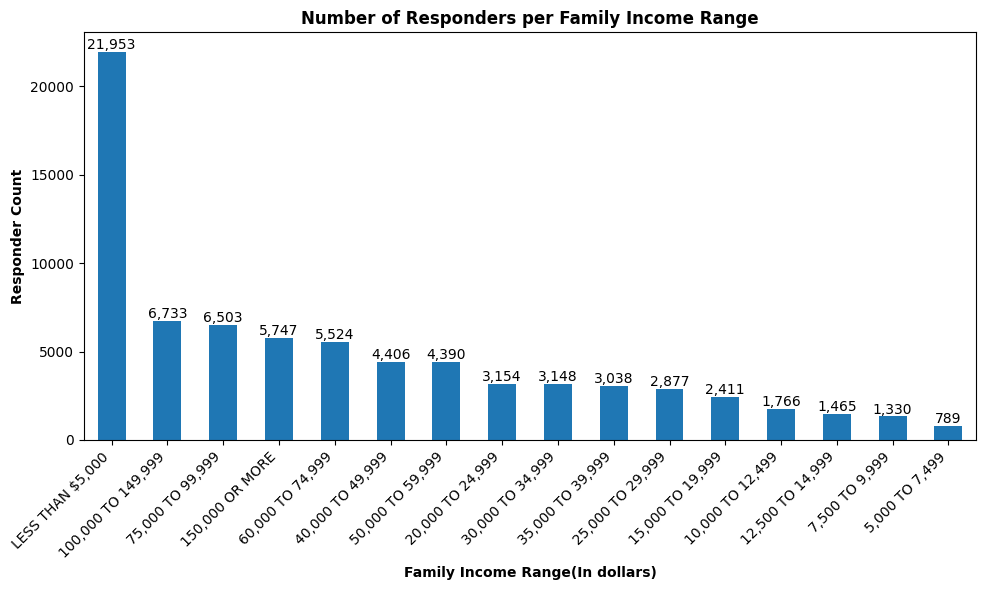

In [34]:


# Group the data by family income and count the responders

income_counts = df.drop_duplicates().groupby('family_income')['household_identifier'].count().sort_values(ascending=False)
# Plot the data
plt.figure(figsize=(10, 6))
ax = income_counts.plot(kind='bar')
for p in ax.patches:
    count = int(p.get_height())  # Get the count value
    formatted_count = "{:,}".format(count)  # Format the count value with commas
    ax.annotate(formatted_count, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)
plt.xlabel('Family Income Range(In dollars)', fontweight='bold')
plt.ylabel('Responder Count', fontweight='bold')
plt.title('Number of Responders per Family Income Range', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


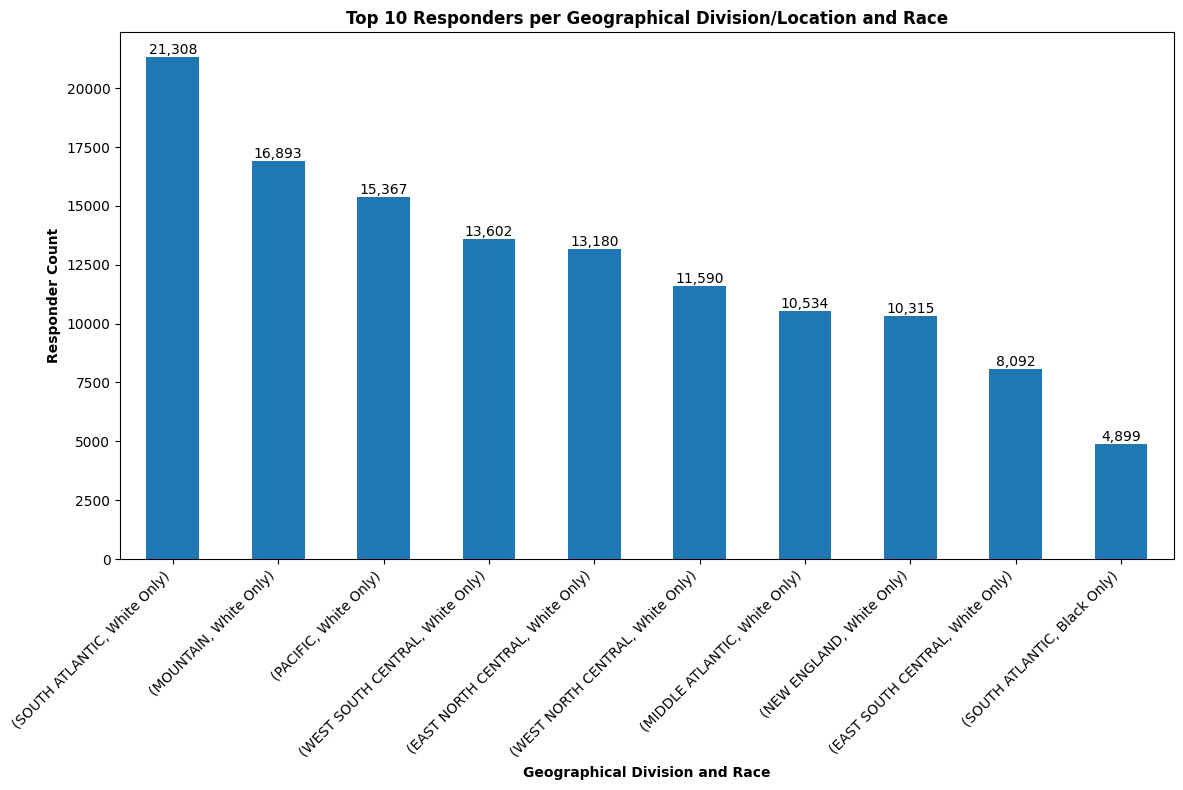

In [35]:

# Group the data by 'geographical_division' and 'race' columns and calculate counts
grouped_data = df.groupby(['geographical_division', 'race']).size().reset_index(name='count')

# Sort the counts in descending order
sorted_data = grouped_data.sort_values(by='count', ascending=False)

# Select the top 10 categories
top_10 = sorted_data.head(10)

# Set the index to a combination of 'geographical_division' and 'race'
top_10.set_index(['geographical_division', 'race'], inplace=True)

# Plot the data
plt.figure(figsize=(12, 8))
ax = top_10['count'].plot(kind='bar')

# # Annotate the bars with count values
for p in ax.patches:
    count = int(p.get_height())  # Get the count value
    formatted_count = "{:,}".format(count)  # Format the count value with commas
    ax.annotate(formatted_count, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)
# Set labels and title in bold
plt.xlabel('Geographical Division and Race', fontweight='bold')
plt.ylabel('Responder Count', fontweight='bold')
plt.title('Top 10 Responders per Geographical Division/Location and Race', fontweight='bold')

# Set x-axis labels rotation and alignment
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


In [36]:


filtered_data = df[
    (df["household_has_telephone"] == "NO") &
    (df["household_telephone_access_elsewhere"] == "YES") &
    (df["accept_telephone_interview"] == "YES")
]

# Count the number of responders in the filtered data
count_responders_accept_phone_interview = len(filtered_data)


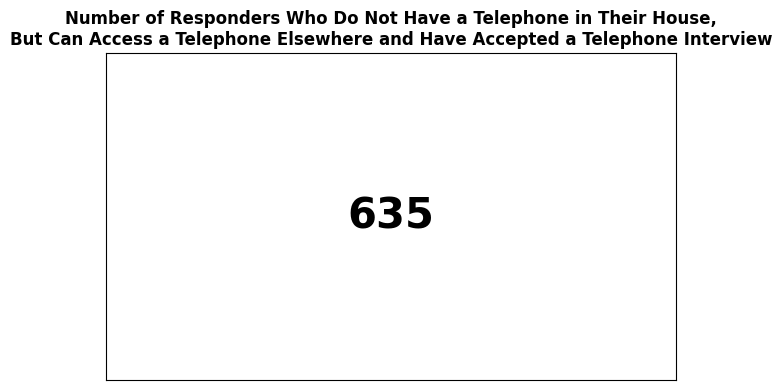

In [37]:

plt.figure(figsize=(6, 4))
ax = plt.gca()

ax.annotate(f"{count_responders_accept_phone_interview}", (0.5, 0.5), ha='center', va='center', fontsize=30, fontweight='bold')

# Remove x and y ticks
ax.set_xticks([])
ax.set_yticks([])

# Set plot title
plt.title('Number of Responders Who Do Not Have a Telephone in Their House,\nBut Can Access a Telephone Elsewhere and Have Accepted a Telephone Interview', fontweight="bold")

plt.tight_layout()
plt.show()


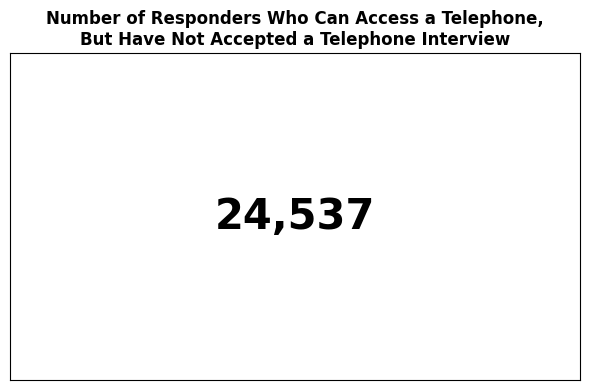

In [38]:

filtered_data = df[(df["household_telephone_access_elsewhere"] == "YES") & (df["accept_telephone_interview"] == "NO")]

count_responders_reject_phone_interview = len(filtered_data)

plt.figure(figsize=(6, 4))
ax = plt.gca()
formatted_count_responders_reject_phone_interview = "{:,}".format(count_responders_reject_phone_interview)

ax.annotate(f"{formatted_count_responders_reject_phone_interview}", (0.5, 0.5), ha='center', va='center', fontsize=30, fontweight='bold')

ax.set_xticks([])
ax.set_yticks([])

plt.title('Number of Responders Who Can Access a Telephone,\nBut Have Not Accepted a Telephone Interview', fontweight="bold")

plt.tight_layout()
plt.show()
